## Importing the packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tflearn

from tflearn.data_utils import shuffle

from tflearn.layers.core import (dropout,
                                 fully_connected, flatten)
from tflearn.layers.normalization import batch_normalization
from tflearn.layers.conv import conv_2d, max_pool_2d

from tflearn.layers.estimator import regression

from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation

curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [3]:
import tensorflow as tf

In [4]:
from sklearn.preprocessing import OneHotEncoder

In [5]:
import pickle

In [6]:
import gzip
import random

## Extracting the data

In [7]:
f = gzip.open('datasets/mnist/mnist.pkl.gz')
data = pickle.load(f, encoding='bytes')
f.close()

In [8]:
tf.reset_default_graph()

In [9]:
(X_train, y_train), (X_test, y_test) = data

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
y_train.shape

(60000,)

## Visualization

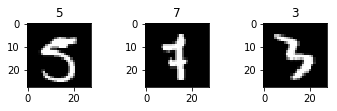

In [12]:
for i in range(6, 9):
    
    rand_i = random.randint(0, X_train.shape[0])
    
    plt.subplot(331+i)
    plt.imshow(X_train[rand_i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[rand_i]) 

## Preprocessing

In [13]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [14]:
X_train.shape

(60000, 28, 28, 1)

In [15]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [16]:
y_train_ohc = pd.get_dummies(y_train)
y_test_ohc = pd.get_dummies(y_test)

In [17]:
# shuffling the data
X_train, y_train = shuffle(X_train, y_train)

In [18]:
# normalizing
img_pre = ImagePreprocessing()
img_pre.add_featurewise_zero_center()
img_pre.add_featurewise_stdnorm()

In [19]:
# image augmentation
img_aug = ImageAugmentation()
img_aug.add_random_rotation(max_angle=5.)

## Network Architecture

In [20]:
def le_net(IMG_PRE=img_pre, IMG_AUG=img_aug):
    '''
    Takes a custom Image Preprocessing and
    Image Augmentation techniques.
    '''
    network = tflearn.input_data(shape=[None, 28, 28, 1],
                         data_preprocessing=IMG_PRE,
                        data_augmentation=IMG_AUG)

    network = conv_2d(network, 32, (3,3), activation='relu')
    network = max_pool_2d(network, 2)
    
    network = conv_2d(network, 64, (3,3), activation='relu')
    network = max_pool_2d(network, 2)
    
    network = fully_connected(network, 1024, activation='relu')
    network = dropout(network, 0.8)
    
    network = fully_connected(network, 10, activation='softmax')
    
    network = regression(network, optimizer='adam',
                        loss='categorical_crossentropy',
                        learning_rate=0.001)
    
    network = tflearn.DNN(network)
    
    return network

In [21]:
model = le_net()

Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [22]:
model.fit(np.array(X_train, dtype=np.float64), np.array(y_train_ohc),
          validation_set=(np.array(X_test, dtype=np.float64),
                          np.array(y_test_ohc)),
          
          n_epoch=10, shuffle=True,
          show_metric=True,
          batch_size=64,
          snapshot_epoch=True, run_id='mnist-classifier')

Training Step: 9379  | total loss: 2.30189 | time: 10.552s
| Adam | epoch: 010 | loss: 2.30189 - acc: 0.1046 -- iter: 59968/60000
Training Step: 9380  | total loss: 2.30203 | time: 11.789s
| Adam | epoch: 010 | loss: 2.30203 - acc: 0.1035 | val_loss: 2.30114 - val_acc: 0.1135 -- iter: 60000/60000
--


In [23]:
# Save model when training is complete to a file
model.save("mnist-classifier.tfl")
print(“Network trained and saved as bird-classifier.tfl!”)

SyntaxError: invalid character in identifier (<ipython-input-23-c2a8571d01db>, line 3)